In [1]:
from __future__ import print_function


import numpy as np
import time
from keras.applications import vgg16
from keras import backend as K
from scipy.misc import imsave
# dimensions of the generated pictures for each filter.
img_width = 128
img_height = 128

# the name of the layer we want to visualize
# (see model definition at keras/applications/vgg16.py)
layer_name = 'block5_conv1'

# util function to convert a tensor into a valid image




Using TensorFlow backend.


In [26]:
layer_dict

{'block1_conv1': <keras.layers.convolutional.Convolution2D at 0x8d92359eb8>,
 'block1_conv2': <keras.layers.convolutional.Convolution2D at 0x8d9234f7f0>,
 'block1_pool': <keras.layers.pooling.MaxPooling2D at 0x8d9236fda0>,
 'block2_conv1': <keras.layers.convolutional.Convolution2D at 0x8d9236ff98>,
 'block2_conv2': <keras.layers.convolutional.Convolution2D at 0x8d9238b7b8>,
 'block2_pool': <keras.layers.pooling.MaxPooling2D at 0x8d923acf60>,
 'block3_conv1': <keras.layers.convolutional.Convolution2D at 0x8d923ac3c8>,
 'block3_conv2': <keras.layers.convolutional.Convolution2D at 0x8d923c9f60>,
 'block3_conv3': <keras.layers.convolutional.Convolution2D at 0x8d923d8e48>,
 'block3_pool': <keras.layers.pooling.MaxPooling2D at 0x8d923f5dd8>,
 'block4_conv1': <keras.layers.convolutional.Convolution2D at 0x8d92404c88>,
 'block4_conv2': <keras.layers.convolutional.Convolution2D at 0x8d92414dd8>,
 'block4_conv3': <keras.layers.convolutional.Convolution2D at 0x8d93961d68>,
 'block4_pool': <keras.

In [11]:
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + K.epsilon())
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

# build the VGG16 network with ImageNet weights
model = vgg16.VGG16(weights='imagenet', include_top=False)
print('Model loaded.')

model.summary()

# this is the placeholder for the input images
input_img = model.input

# get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model.layers[1:]])


def normalize(x):
    # utility function to normalize a tensor by its L2 norm
    return x / (K.sqrt(K.mean(K.square(x))) + K.epsilon())

def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + K.epsilon())
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

Model loaded.
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, None, None, 3) 0                                            
____________________________________________________________________________________________________
block1_conv1 (Convolution2D)     (None, None, None, 64 1792        input_2[0][0]                    
____________________________________________________________________________________________________
block1_conv2 (Convolution2D)     (None, None, None, 64 36928       block1_conv1[0][0]               
____________________________________________________________________________________________________
block1_pool (MaxPooling2D)       (None, None, None, 64 0           block1_conv2[0][0]               
_____________________________________________________________________________

In [31]:
layer_output = layer_dict[layer_name].output
layer_output

<tf.Tensor 'Relu_23:0' shape=(?, ?, ?, 512) dtype=float32>

In [22]:
kept_filters[0][0].shape

(128, 128, 3)

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import math
%matplotlib inline

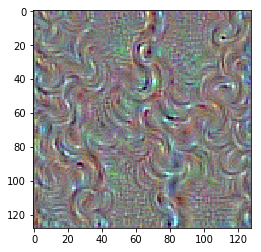

In [30]:
plt.imshow(kept_filters[0][0])

In [34]:

import matplotlib.image as mpimg
cat = mpimg.imread("surprised-cat.jpg")

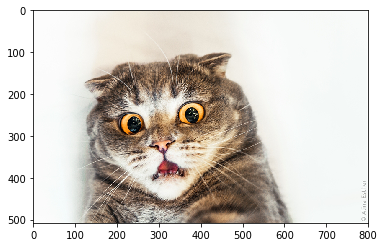

In [35]:
plt.imshow(cat)

In [37]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten

In [105]:
model = Sequential()
model.add(Conv2D(24, 15, 15, activation='elu', subsample=(2, 2),input_shape =cat.shape))
model.add(Conv2D(24, 5, 5, activation='elu', subsample=(2, 2)))
model.add(Conv2D(36, 5, 5, activation='elu', subsample=(2, 2)))
model.add(Conv2D(48, 5, 5, activation='elu', subsample=(2, 2)))
# model.add(Conv2D(64, 3, 3, activation='elu'))
# model.add(Conv2D(64, 3, 3, activation='elu'))
# model.add(Dropout(keep_prob))
# model.add(Flatten())
# model.add(Dense(100, activation='elu'))
# model.add(Dense(50, activation='elu'))
# model.add(Dense(10, activation='elu'))
# model.add(Dense(1))
# model.summary()


In [108]:
cat_conv = model.predict(cat_batch)

In [109]:
def visualize_cat(cat):
    cat_batch = np.expand_dims(cat,axis=0)
    cat_batch.shape
    cat_conv = model.predict(cat_batch)
    cat_conv[0][:,:,20:23]
    cat_conv[0][:,:,:3].shape
#     catt__ = np.squeeze(c_batch, axis=0)
    plt.imshow(c_batch, cmap="gray")

In [110]:
cat_conv[0].shape

(28, 46, 48)

In [111]:
cat_conv[0][:,:,:3].shape

(28, 46, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


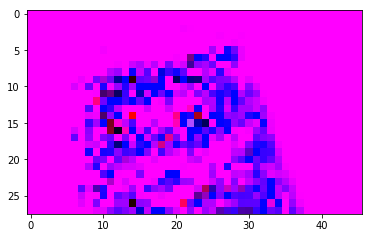

In [116]:
visualize_cat(cat_conv[0][:,:,20:23])

(506, 798, 3)